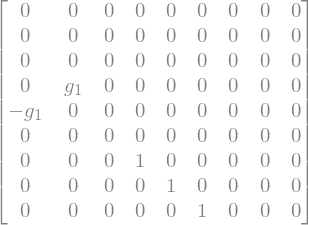

In [2]:
from __future__ import division
import inspect
from sympy.interactive.printing import init_printing
# init_printing(use_unicode=False, wrap_line=False, use_latex="mathjax")

init_printing(use_unicode=False, wrap_line=False)
# from sympy.interactive import init_session
# init_session() 
from sympy.matrices import Matrix, eye, zeros, diag
from sympy import symbols, diff
import sympy as sp
import numpy as np

m = 9
n = 2
T = 4
#consider a 2 robot system.
A1 = zeros(m, m)
B1 = zeros(m, T)
gravity1 = sp.Symbol('g1')
A1[3, 1] = gravity1
A1[4, 0] = -gravity1
A1[6:, 3:6] = eye(3)
A1

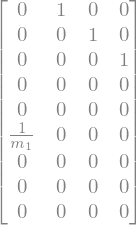

In [3]:
mass1 = symbols('m1')
B1[5, 0] = 1 / mass1
B1[:3, 1:] = eye(3)
B1

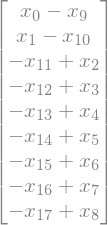

In [4]:

c = sp.symbols('c', real=True)
Ds = Matrix([sp.symbols('Ds')], real=True)
e7 = Matrix([0, 0, 0, 0, 0, 0, 1, 0, 0])
e8 = Matrix([0, 0, 0, 0, 0, 0, 0, 1, 0])
e9 = Matrix([0, 0, 0, 0, 0, 0, 0, 0, 1])
Exy = Matrix([e7.T, e8.T])
Ez = e9.T

A2 = A1.copy()
gravity2 = sp.Symbol('g2')
A2[3, 1] = gravity2
A2[4, 0] = -gravity2

B2 = B1.copy()
mass2 = symbols('m2')
B2[5, 0] = 1 / mass2
A = diag([A1, A2], unpack=True)
B = diag([B1, B2], unpack=True)
x = Matrix(symbols('x:%d' % (m*n), real=True))
uhat = Matrix(symbols('uhat:%d' % (n*T), real=True))
xdes = Matrix(symbols('xdes:%d' % (m*n)))
xhat = x-xdes

eij = Matrix(x[:m]) - Matrix(x[m:])
eij

In [5]:
def norm2(_x):
    return sp.sqrt(_x.T @ _x)

In [6]:
def h(eij):
    return norm2(Exy @ (eij)) ** 4 + ((Ez / c) @ (eij)) ** 4 - Ds ** 4


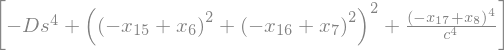

In [7]:
hij = h(eij)
hij

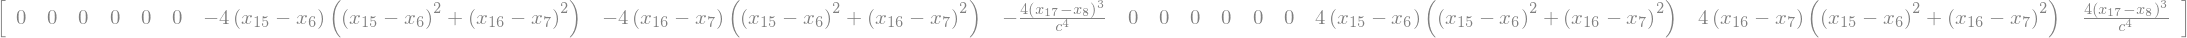

In [8]:
dhdx = hij.jacobian(x)
dhdx = dhdx.simplify()
dhdx

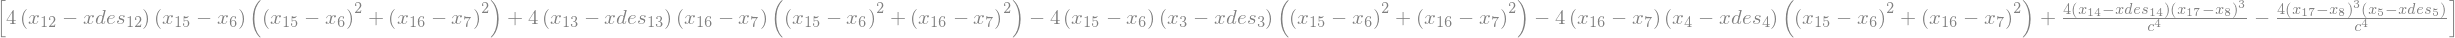

In [9]:
xdot = A @ xhat + B @ uhat
x_to_e = Matrix.hstack(eye(m), -eye(m))
# edot = x_to_e @ xdot
hdot = dhdx @ xdot
hdot

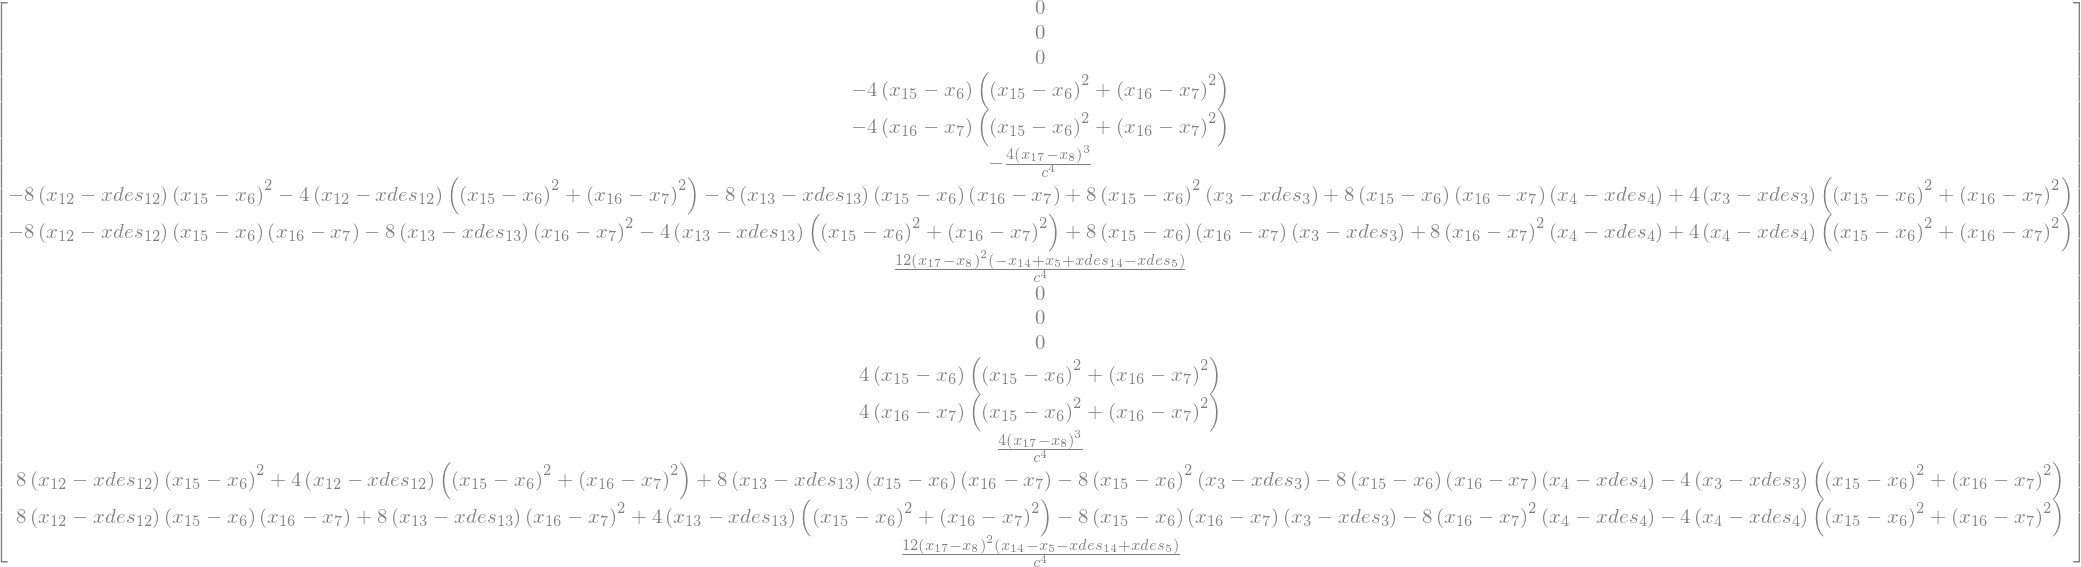

In [10]:
dhdotdx = hdot.jacobian(x)
dhdotdx.simplify()
dhdotdx.T

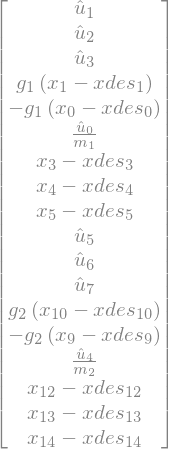

In [11]:
xdot

In [12]:
h2dot = dhdotdx @ xdot
h2dot.simplify()

In [13]:
dh2dotdx = h2dot.jacobian(x)
dh2dotdx.simplify()

In [14]:
h3dot = dh2dotdx @ xdot
h3dot.simplify()


In [161]:

func = sp.lambdify((x, xdes, uhat, gravity1, gravity2, mass1, mass2, c), hdot[0], 'numpy')
print(inspect.getsource(func))

def _lambdifygenerated(_Dummy_101, _Dummy_102, _Dummy_103, g1, g2, m1, m2, c):
    [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17] = _Dummy_101
    [xdes0, xdes1, xdes2, xdes3, xdes4, xdes5, xdes6, xdes7, xdes8, xdes9, xdes10, xdes11, xdes12, xdes13, xdes14, xdes15, xdes16, xdes17] = _Dummy_102
    [uhat0, uhat1, uhat2, uhat3, uhat4, uhat5, uhat6, uhat7] = _Dummy_103
    return 4*(x12 - xdes12)*(x15 - x6)*((x15 - x6)**2 + (x16 - x7)**2) + 4*(x13 - xdes13)*(x16 - x7)*((x15 - x6)**2 + (x16 - x7)**2) - 4*(x15 - x6)*(x3 - xdes3)*((x15 - x6)**2 + (x16 - x7)**2) - 4*(x16 - x7)*(x4 - xdes4)*((x15 - x6)**2 + (x16 - x7)**2) + 4*(x14 - xdes14)*(x17 - x8)**3/c**4 - 4*(x17 - x8)**3*(x5 - xdes5)/c**4



In [162]:
h2dot.simplify()
func2 = sp.lambdify((x, xdes, uhat, gravity1, gravity2, mass1, mass2, c), h2dot[0], 'numpy')
print(inspect.getsource(func2))

def _lambdifygenerated(_Dummy_104, _Dummy_105, _Dummy_106, g1, g2, m1, m2, c):
    [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17] = _Dummy_104
    [xdes0, xdes1, xdes2, xdes3, xdes4, xdes5, xdes6, xdes7, xdes8, xdes9, xdes10, xdes11, xdes12, xdes13, xdes14, xdes15, xdes16, xdes17] = _Dummy_105
    [uhat0, uhat1, uhat2, uhat3, uhat4, uhat5, uhat6, uhat7] = _Dummy_106
    return 4*(c**4*m1*m2*(g1*(x0 - xdes0)*(x16 - x7)*((x15 - x6)**2 + (x16 - x7)**2) - g1*(x1 - xdes1)*(x15 - x6)*((x15 - x6)**2 + (x16 - x7)**2) + g2*(x10 - xdes10)*(x15 - x6)*((x15 - x6)**2 + (x16 - x7)**2) - g2*(x16 - x7)*(x9 - xdes9)*((x15 - x6)**2 + (x16 - x7)**2) + (x12 - xdes12)*(2*(x12 - xdes12)*(x15 - x6)**2 + (x12 - xdes12)*((x15 - x6)**2 + (x16 - x7)**2) + 2*(x13 - xdes13)*(x15 - x6)*(x16 - x7) + 2*(x15 - x6)**2*(-x3 + xdes3) - 2*(x15 - x6)*(x16 - x7)*(x4 - xdes4) - (x3 - xdes3)*((x15 - x6)**2 + (x16 - x7)**2)) + (x13 - xdes13)*(2*(x12 - xdes12)*(x15 - x6)*(x16 - x7) + 2*(x13 - x

In [164]:
func3 = sp.lambdify((x, xdes, uhat, gravity1, gravity2, mass1, mass2, c), h3dot[0], 'numpy')
print(inspect.getsource(func3))

def _lambdifygenerated(_Dummy_110, _Dummy_111, _Dummy_112, g1, g2, m1, m2, c):
    [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17] = _Dummy_110
    [xdes0, xdes1, xdes2, xdes3, xdes4, xdes5, xdes6, xdes7, xdes8, xdes9, xdes10, xdes11, xdes12, xdes13, xdes14, xdes15, xdes16, xdes17] = _Dummy_111
    [uhat0, uhat1, uhat2, uhat3, uhat4, uhat5, uhat6, uhat7] = _Dummy_112
    return 4*(c**4*m1*m2*(g1*uhat1*(x16 - x7)*((x15 - x6)**2 + (x16 - x7)**2) - g1*uhat2*(x15 - x6)*((x15 - x6)**2 + (x16 - x7)**2) + g1*(x0 - xdes0)*(4*(x12 - xdes12)*(x15 - x6)*(x16 - x7) + 2*(x13 - xdes13)*(x16 - x7)**2 + (x13 - xdes13)*((x15 - x6)**2 + (x16 - x7)**2) + (x13 - xdes13)*((x15 - x6)**2 + 3*(x16 - x7)**2) - 4*(x15 - x6)*(x16 - x7)*(x3 - xdes3) + 2*(x16 - x7)**2*(-x4 + xdes4) - (x4 - xdes4)*((x15 - x6)**2 + (x16 - x7)**2) - (x4 - xdes4)*((x15 - x6)**2 + 3*(x16 - x7)**2)) - g1*(x1 - xdes1)*(2*(x12 - xdes12)*(x15 - x6)**2 + (x12 - xdes12)*((x15 - x6)**2 + (x16 - x7)**2) + (x12 

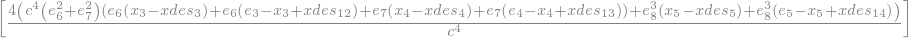

In [115]:
#try and simplify the expressions by substituting ei = x[i] - x[9+i], so replace x[i] with e[i] + x[9+i]
# eij = symbols('e:9')
# 
# for i in range(9):
#     hij = hij.subs(x[i], eij[i] + x[9+i])
#     hij = hij.subs(x[9+i], x[i] - eij[i])
#     
#     hdot = hdot.subs(x[i], eij[i] + x[9+i])
#     hdot = hdot.subs(x[9+i], x[i] - eij[i])
#     
#     h2dot = h2dot.subs(x[i], eij[i] + x[9+i])
#     h2dot = h2dot.subs(x[9+i], x[i] - eij[i])
#     
#     h3dot = h3dot.subs(x[i], eij[i] + x[9+i])
#     h3dot = h3dot.subs(x[9+i], x[i] - eij[i])
# hdot.simplify()
# hdot